In [831]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data Understanding

In [832]:
df = pd.read_csv("ALL_DATA.csv") 
# x = pd.read_csv("ALL_DATA.csv")
print(df.dtypes)

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object


In [833]:
df.tail(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
990,991,2023-12-26,CUST991,Female,34,Clothing,2,50,100
991,992,2023-08-21,CUST992,Female,57,Electronics,2,30,60
992,993,2023-02-06,CUST993,Female,48,Electronics,3,50,150
993,994,2023-12-18,CUST994,Female,51,Beauty,2,500,1000
994,995,2023-04-30,CUST995,Female,41,Clothing,1,30,30
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [834]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


In [835]:
print(df.shape)

(1000, 9)


In [836]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [837]:
print(df['Product Category'].value_counts(),df['Gender'].value_counts(),df['Age'].value_counts(), sep = "\n\n")
# print(df['Gender'].value_counts())


Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

Gender
Female    510
Male      490
Name: count, dtype: int64

Age
43    31
64    31
57    30
51    30
34    28
54    28
22    27
62    27
42    26
47    26
46    25
23    24
40    24
50    23
27    23
52    22
60    22
30    22
26    22
31    22
35    22
28    21
41    21
18    21
55    21
20    21
19    21
21    20
25    20
49    19
56    19
32    19
38    19
61    18
39    18
48    18
63    17
45    17
59    17
53    17
29    16
37    16
36    15
44    15
24    15
58    14
33    10
Name: count, dtype: int64


In [838]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [839]:
cor_matrix = df.drop(columns = "Transaction ID").select_dtypes(include = 'number').corr()
cor_matrix

,Age,Quantity,Price per Unit,Total Amount
Age,1.000000,-0.023737,-0.038423,-0.060568
Quantity,-0.023737,1.000000,0.017501,0.373707
Price per Unit,-0.038423,0.017501,1.000000,0.851925
Total Amount,-0.060568,0.373707,0.851925,1.000000


In [840]:
extracted_years = df['Date'].str.extract(r'(\d{4})')

# Step 2: Access the extracted column
extracted_years_series = extracted_years[0]

# Step 3: Get unique years
unique_years = extracted_years_series.value_counts()
unique_years



#Because the dates are 1st january i will not remove those rows

0
2023    998
2024      2
Name: count, dtype: int64

In [841]:
df.head(7)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50


In [842]:
# print(extracted_years)
df.loc[0:6:2, ["Date", "Customer ID", "Gender"]]

,Date,Customer ID,Gender
0,2023-11-24,CUST001,Male
2,2023-01-13,CUST003,Male
4,2023-05-06,CUST005,Male
6,2023-03-13,CUST007,Male


In [843]:
# Step 4: Filter the DataFrame for the specific year (2024)
filtered_df = df[extracted_years_series.astype(int) == 2024]
filtered_df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
210,211,2024-01-01,CUST211,Male,42,Beauty,3,500,1500
649,650,2024-01-01,CUST650,Male,55,Electronics,1,30,30


In [844]:
df[extracted_years.astype(int) == 2024]

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [845]:
print(df.columns)

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [846]:
df.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


# Data Cleaning and Data Visualisations

In [847]:
df = df.drop(columns = ["Customer ID", "Transaction ID"])
df.rename(columns={"Product Category": "Category"}, inplace=True)

#### Task 1: Add Month and Day column and convert column Date to datetime type

In [848]:
df["Month"] = df["Date"].str[5:7]
df["Month"] = df["Month"].astype('int32')
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%d")
df["Day"] = df["Date"].dt.day_name()

#### Task 2: Add age group

In [849]:
ages = list(df["Age"])
bins = [18,27,37,47,57,64]
labels = ['18 - 27', '28 - 37','38 - 47', '48 - 57', '58 - 64']
df['Age Group'] = pd.cut(df['Age'], bins = bins, labels = labels)
quantity_by_age_gender = df.groupby(['Age Group', 'Gender'])['Quantity'].sum().unstack()
total_amount_by_age_gender = df.groupby(['Age Group', 'Gender'])['Total Amount'].sum().unstack()

C:\Users\Acer\AppData\Local\Temp\ipykernel_6620\2012800016.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantity_by_age_gender = df.groupby(['Age Group', 'Gender'])['Quantity'].sum().unstack()
C:\Users\Acer\AppData\Local\Temp\ipykernel_6620\2012800016.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_amount_by_age_gender = df.groupby(['Age Group', 'Gender'])['Total Amount'].sum().unstack()


#### Task 3: Add Months Quartiles

In [850]:
df['Quartile'] = pd.cut(df['Month'],bins = [0,3,6,9,12], labels=['Q1', 'Q2', 'Q3', 'Q4'])
total_amount_by_quartile = df.groupby('Quartile')['Total Amount'].sum()

C:\Users\Acer\AppData\Local\Temp\ipykernel_6620\1456453391.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_amount_by_quartile = df.groupby('Quartile')['Total Amount'].sum()


#### Task 4: Grouping data by Categories and Total Amounts

In [851]:
cat_quantity = df.groupby('Category')['Quantity'].sum()
cat_total = df.groupby('Category')['Total Amount'].sum().reset_index()

#### Task 5: Grouping data by Categories,Total Amount and Age Group

In [852]:
cat_age_quantity = df.groupby(['Age Group', 'Category'])['Quantity'].sum().unstack()
cat_age_total = df.groupby(['Age Group', 'Category'])['Total Amount'].sum().unstack()


C:\Users\Acer\AppData\Local\Temp\ipykernel_6620\1669976422.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_age_quantity = df.groupby(['Age Group', 'Category'])['Quantity'].sum().unstack()
C:\Users\Acer\AppData\Local\Temp\ipykernel_6620\1669976422.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_age_total = df.groupby(['Age Group', 'Category'])['Total Amount'].sum().unstack()


#### Task 6: Add Season column

In [924]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
df['Season'] = df['Month'].apply(get_season)

#### Question 1: How does customer age and gender influence their purchasing behavior?

C:\Users\Acer\AppData\Local\Temp\ipykernel_6620\1991933578.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_age = df.groupby('Age Group')['Total Amount'].sum().reset_index()


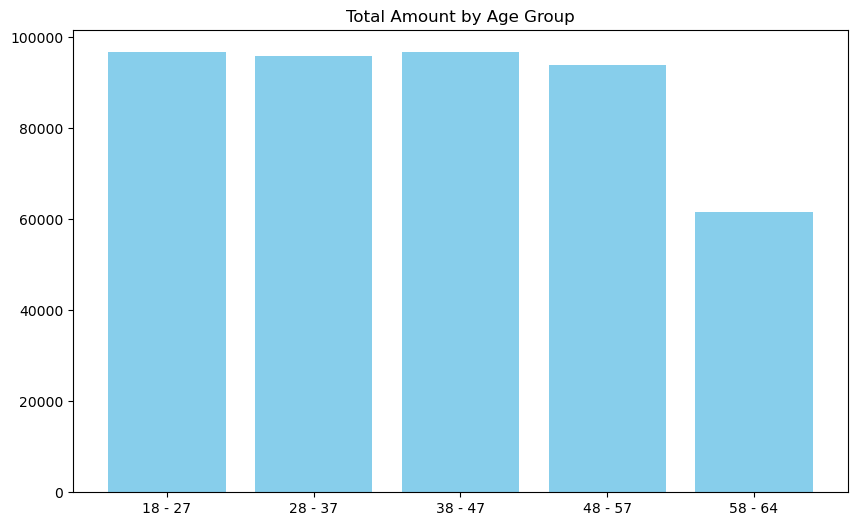

In [853]:
grouped_age = df.groupby('Age Group')['Total Amount'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(grouped_age['Age Group'], grouped_age['Total Amount'], color='skyblue')
# plt.xlabel('Age Group')
# plt.ylabel('Total Amount')
plt.title('Total Amount by Age Group')
plt.xticks(rotation=0)
plt.show()

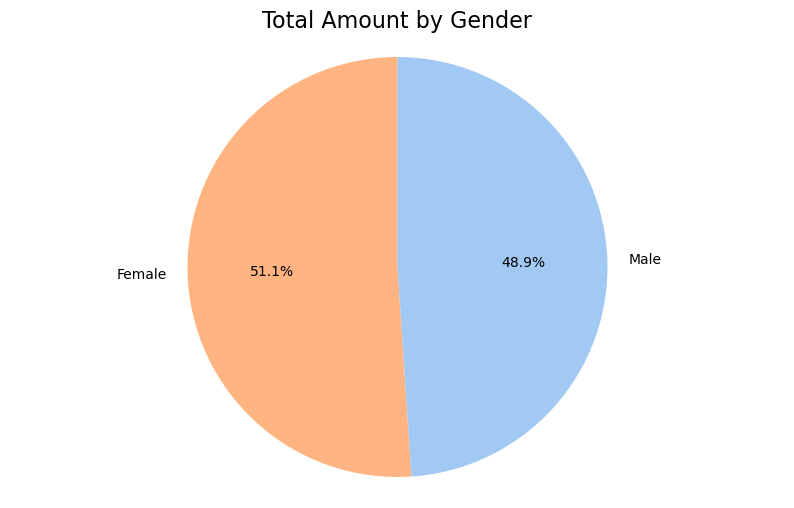

In [919]:
grouped_age = df.groupby('Gender')['Total Amount'].sum().reset_index()

plt.figure(figsize=(10, 6))
colors = sns.color_palette("pastel")
plt.pie(grouped_age['Total Amount'], labels=grouped_age['Gender'], autopct='%1.1f%%', startangle=90, colors=[colors[1], colors[0]])
plt.title('Total Amount by Gender', fontsize=16)
plt.axis('equal')

plt.show()

<Figure size 800x1000 with 0 Axes>

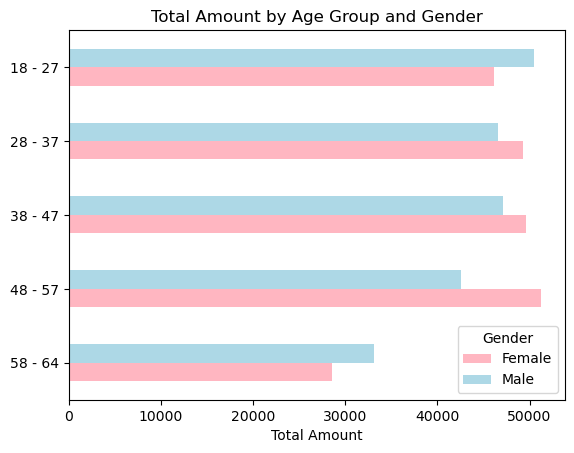

In [975]:
plt.figure(figsize=(8, 10))
total_amount_by_age_gender.sort_index(ascending=False).plot(kind='barh', color = ['lightpink', 'lightblue'])
plt.title('Total Amount by Age Group and Gender')
plt.ylabel('')
plt.xlabel('Total Amount')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.show()

<Figure size 1200x600 with 0 Axes>

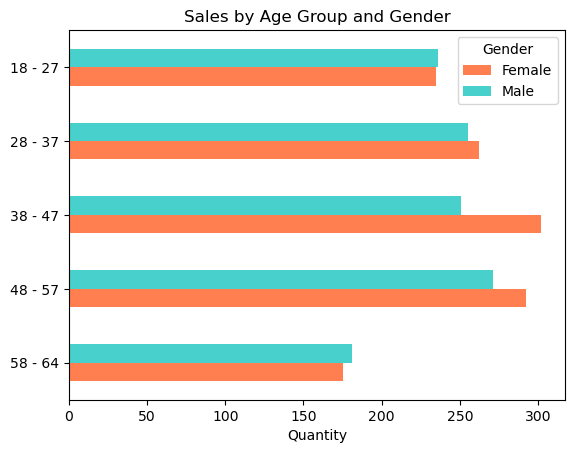

In [974]:
plt.figure(figsize=(12, 6))
quantity_by_age_gender.sort_index(ascending=False).plot(kind='barh',color = ['coral', 'mediumturquoise'])
plt.title('Sales by Age Group and Gender')
plt.ylabel('')
plt.xlabel('Quantity')
plt.legend(title='Gender')
plt.xticks(rotation = 0)
plt.show()

#### Question 2: Are there noticiable patterns in sales across different time periods?


* Visualization of Total Amount by Day

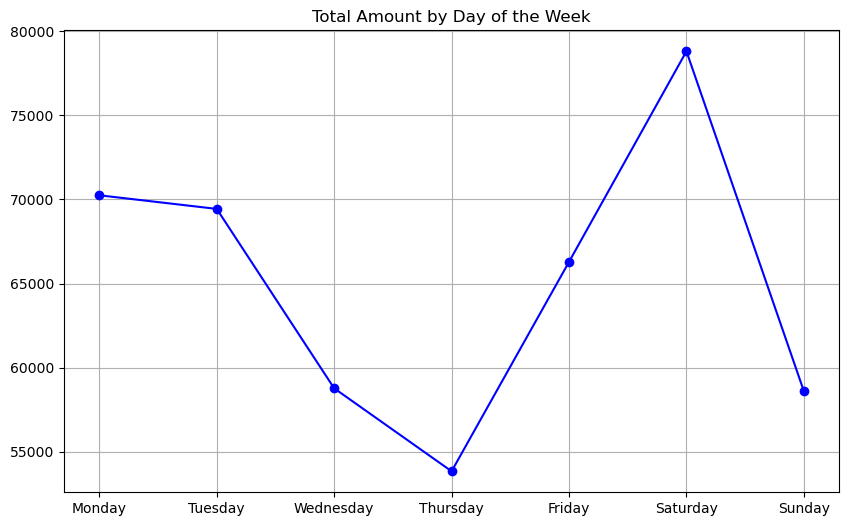

In [940]:
time_series = df.groupby('Day')['Total Amount'].sum()
labels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
time_series = time_series.reindex(labels)

plt.figure(figsize=(10, 6))
plt.plot(time_series.index, time_series.values, marker='o', linestyle='-', color='blue')
plt.title('Total Amount by Day of the Week')
# plt.xlabel('Day')
# plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

* Visualisation of Total Amount by Quartiles

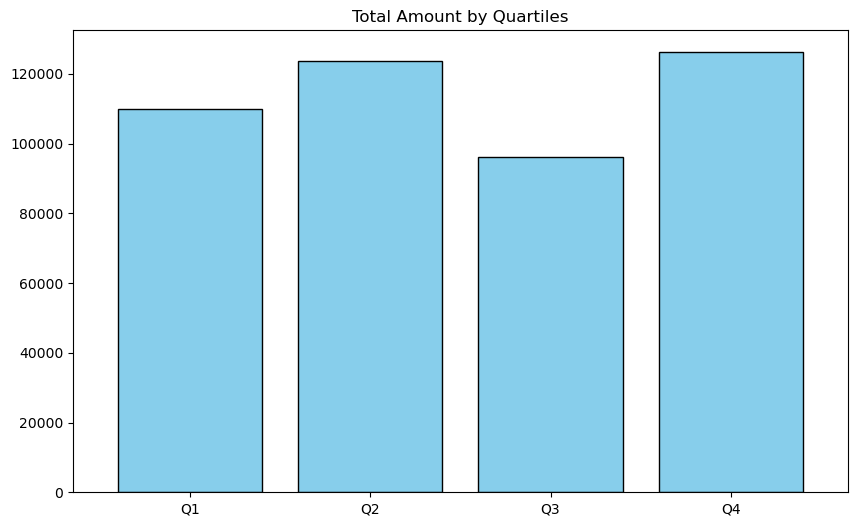

In [858]:
plt.figure(figsize=(10, 6))
total_amount_by_quartile.plot(kind='bar', color='skyblue', edgecolor='black', width = 0.8)
plt.title('Total Amount by Quartiles')
plt.xlabel('')
# plt.ylabel('Total Amount')
plt.xticks(rotation = 0)
plt.show()

#### Question 3: Which product categories hold the highest appeal among customers?

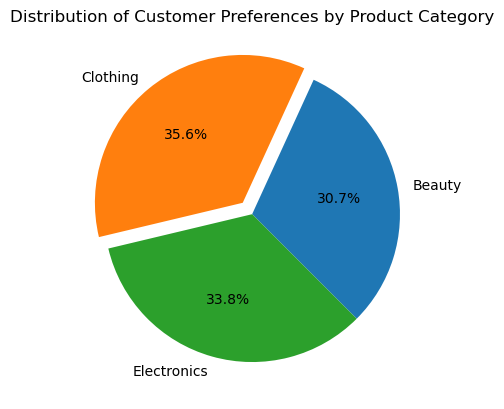

In [859]:
ax = plt.subplot()
explode = (0,0.1,0)
ax.pie(cat_quantity, explode = explode, labels=cat_quantity.index, autopct='%1.1f%%', startangle=-45)
plt.title("Distribution of Customer Preferences by Product Category")
plt.show()

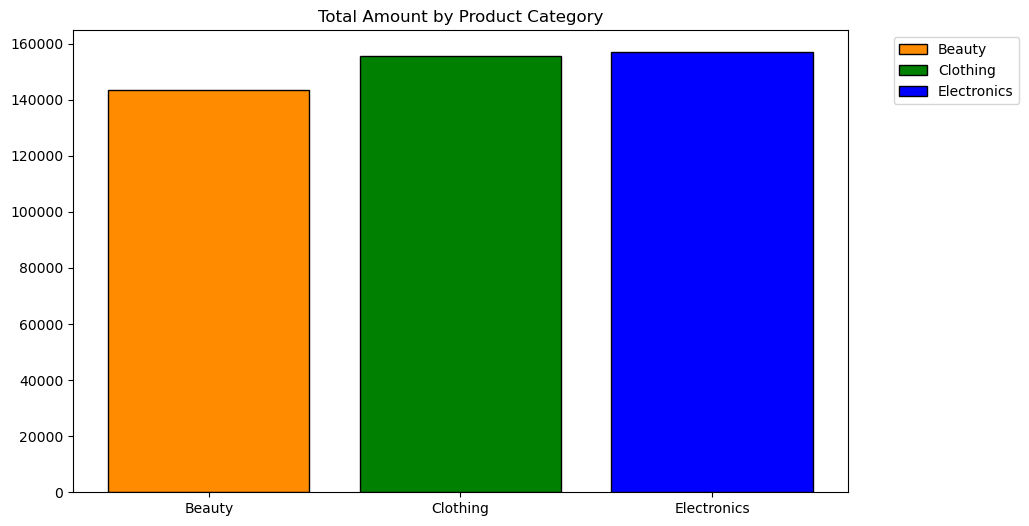

In [860]:
plt.figure(figsize=(10, 6))
bars = plt.bar(cat_total.index, cat_total['Total Amount'], color = ['darkorange', 'green', 'blue'], edgecolor='black', width=0.8)
plt.legend(bars, cat_total['Category'], bbox_to_anchor=(1.05, 1))
plt.title('Total Amount by Product Category')
plt.xlabel('')
# Add x-axis tick labels with category names
plt.xticks(ticks=cat_total.index, labels=cat_total['Category'], rotation=0)
# Show the plot
plt.show()

#### Question 4: What are the relationships between age, spending, and product preferences?


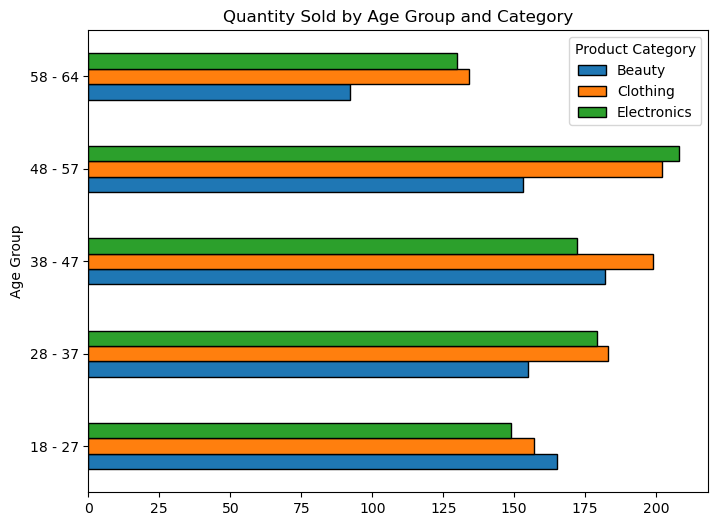

In [964]:
cat_age_quantity.plot(kind = 'barh',figsize = (8, 6),edgecolor = 'black')
plt.title('Quantity Sold by Age Group and Category')
# plt.xlabel("Age Group")
# plt.ylabel("Quantity Sold")
plt.legend(title = 'Product Category')
plt.xticks(rotation = 0)
plt.show()

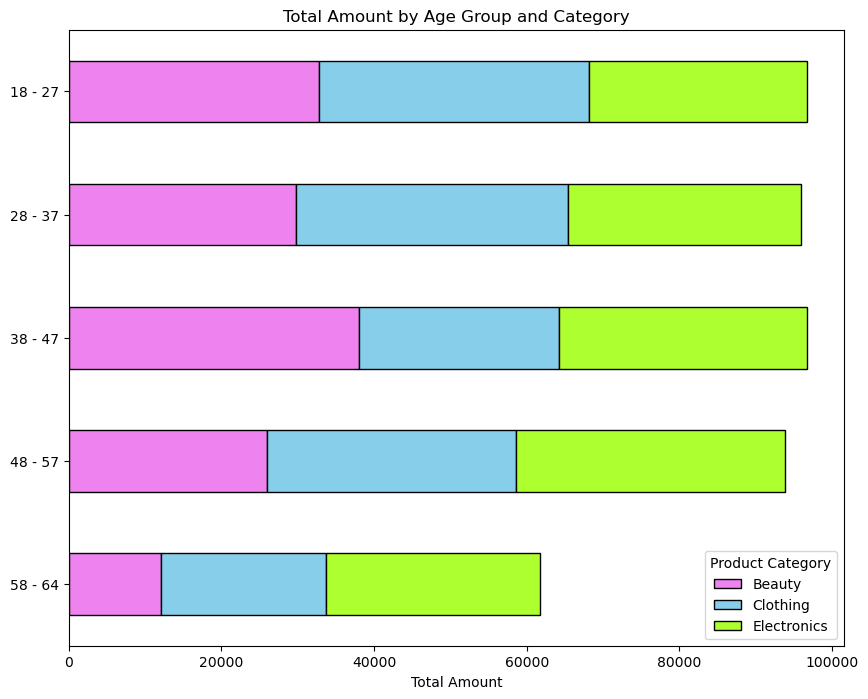

In [972]:
cat_age_total.sort_index(ascending=False).plot(kind='barh', stacked=True, figsize=(10, 8), edgecolor='black', color = ['violet','skyblue', 'greenyellow'])
plt.title('Total Amount by Age Group and Category')
plt.xlabel("Total Amount")
plt.ylabel("")
plt.legend(title = 'Product Category')
plt.xticks(rotation = 0)
plt.show()

#### Question 5: How do customers adapt their shopping habits during seasonal trends?

C:\Users\Acer\AppData\Local\Temp\ipykernel_6620\3283600319.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tot_season = df.groupby(['Season', 'Category'])['Total Amount'].sum().unstack()


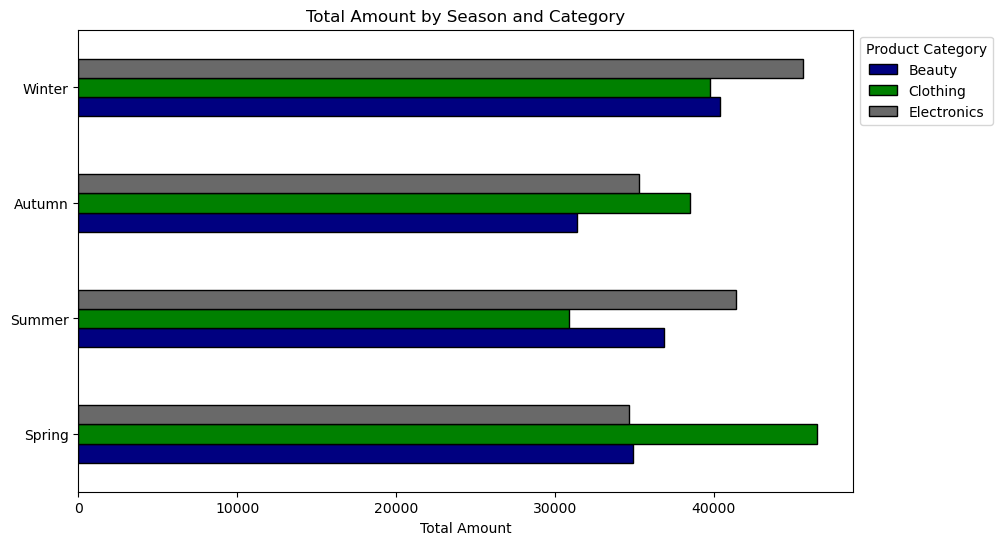

In [971]:
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']
df['Season'] = pd.Categorical(df['Season'], categories=season_order, ordered=True)
tot_season = df.groupby(['Season', 'Category'])['Total Amount'].sum().unstack()

# Plotting the bar chart
tot_season.plot(kind='barh',  figsize=(10, 6), edgecolor='black', color=['navy', 'green', 'dimgray'])
plt.title('Total Amount by Season and Category')
plt.ylabel("")
plt.xlabel("Total Amount")
plt.legend(title='Product Category', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.show()

#### Question 6: What insights can be gleaned from the distribution of product prices within each category?